# Week 4 of Introduction to Biological System Design
## Introduction to Hill Functions
### Ayush Pandey

Pre-requisite: To get the best out of this notebook, make sure that you have the basic understanding of ordinary differential equations. For more information on ODEs you may refer to any standard book on engineering math. To learn more about how to numerically simulate ODEs, refer to [week3_intro_ode.ipynb](https://pages.hmc.edu/pandey/reading/week3_intro_ode.ipynb)

Throughout this notebook, we refer to an ODE with the following equation:

$\frac{dx}{dt} = f(x,t)$

where the function $f(x,t)$ models the rate of change of the variable $x$ with time $t$. A Hill function is a particular kind of nonliner function that can be used to write ODE models for gene regulation in biological systems. In this notebook, we discuss some of the common kinds of Hill functions and their parametrizations.  

# Hill Functions

## Activation Hill Function

If a protein X is activated by a transcription factor A, then an activator Hill function has been shown to satisfactorily describe the gene regulation dynamics. The activation Hill function is given by:

$\text{rate of production of X} = f(A) = \beta\frac{A^n}{K^n + A^n}$

The Hill function describes the promoter activity due to the action of the transcription factor $A$. Now, we will numerically show why a Hill function is a suitable nonlinear function to model gene regulatory interactions. 

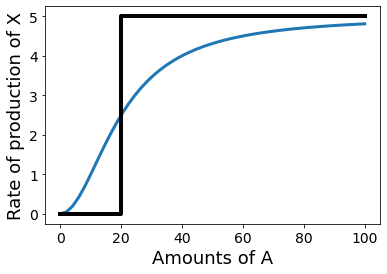

In [18]:
import numpy as np

amounts_of_A = np.linspace(0,100,50) # Let us assume that the amount of activator 
# takes values starting from 0 to 100 (arbitrary units), and that we have 50 such 
# values. In an experimental setting this would correspond to 50 different titrations 
# that would introduce A into the solution starting at 0 and ending at 100.

beta = 5 # the maximal activity parameter. 
K = 20 # the activation constant. 
n = 2 # the Hill coefficient
# We will numerically see the physical implications of these parameters.

# Define the activator Hill function
def activator_hill_function(activator, beta, K, n):
    A = activator
    return beta*(A**n)/(K**n + A**n)

import matplotlib.pyplot as plt
ax = plt.axes()
ax.plot(amounts_of_A, activator_hill_function(amounts_of_A, beta, K, n), lw = 3)
ax.step(np.array([0, K, amounts_of_A[-1]]), np.array([0, 0, beta]), 'k', lw = 4)
ax.set_xlabel('Amounts of A', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.set_ylabel('Rate of production of X', fontsize = 18);

Note that in the above plot the half-max is achieved when amount of A = K, the activation constant (hence, the name). The maximal rate of production of X is capped by the value of $\beta$. So, this nonlinear function represents key biological properties of gene regulation. 

### Effect of the Hill coefficient

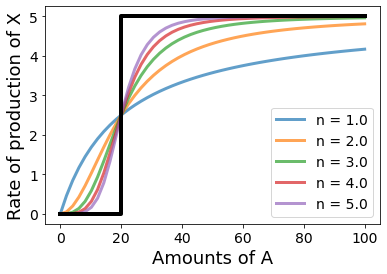

In [26]:
import numpy as np

amounts_of_A = np.linspace(0,100,50) 

beta = 5 # the maximal activity parameter. 
K = 20 # the activation constant. 
n = np.linspace(1, 5, 5) # the Hill coefficient

# Define the activator Hill function
def activator_hill_function(activator, beta, K, n):
    A = activator
    return beta*(A**n)/(K**n + A**n)

import matplotlib.pyplot as plt
ax = plt.axes()
for n_i in n:
    ax.plot(amounts_of_A, activator_hill_function(amounts_of_A, beta, K, n_i), 
            lw = 3, alpha = 0.7, label = 'n = '+str(n_i))
ax.step(np.array([0, K, amounts_of_A[-1]]), np.array([0, 0, beta]), 'k', lw = 4)
ax.set_xlabel('Amounts of A', fontsize = 18)
ax.set_ylabel('Rate of production of X', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

## Repression Hill Function
If a protein X is repressed by a transcription factor Rep, then a repressor Hill function has been shown to satisfactorily describe the gene regulation dynamics. The repression Hill function is given by:

$\text{rate of production of X} = f(Rep) = \beta\frac{K^n}{K^n + Rep^n}$

The Hill function describes the promoter activity due to the action of the transcription factor $Rep$. Now, we will numerically show why a Hill function is a suitable nonlinear function to model gene regulatory interactions. 

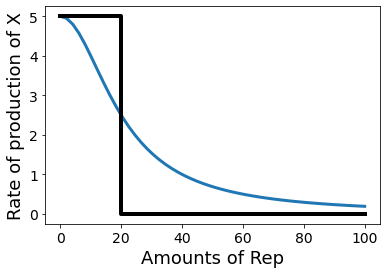

In [25]:
import numpy as np

amounts_of_Rep = np.linspace(0,100,50) # Let us assume that the amount of repressor 
# takes values starting from 0 to 100 (arbitrary units), and that we have 50 such 
# values. In an experimental setting this would correspond to 50 different titrations 
# that would introduce Rep into the solution starting at 0 and ending at 100.

beta = 5 # the maximal activity parameter. 
K = 20 # the activation constant. 
n = 2 # the Hill coefficient
# We will numerically see the physical implications of these parameters.

# Define the activator Hill function
def repressor_hill_function(repressor, beta, K, n):
    Rep = repressor
    return beta*(K**n)/(K**n + Rep**n)

import matplotlib.pyplot as plt
ax = plt.axes()
ax.plot(amounts_of_Rep, repressor_hill_function(amounts_of_Rep, beta, K, n), lw = 3)
ax.step(np.array([0, K, amounts_of_Rep[-1]]), np.array([beta, beta, 0]), 'k', lw = 4)
ax.set_xlabel('Amounts of Rep', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.set_ylabel('Rate of production of X', fontsize = 18);

# TX-TL modeling with gene regulation

For the activated expression of a gene, we can write the following ODE model:

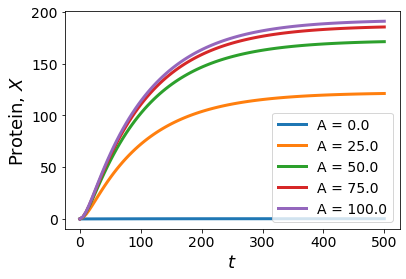

In [50]:
def activated_gene_expression(x, t, *args):
    k_tx, alpha, A, n, K, d_T, k_tl, d_X = args
    T, X = x
    dT_dt = k_tx * (alpha + A**n/(A**n + K**n)) - d_T*T
    dX_dt = k_tl * T - d_X*X
    return np.array([dT_dt, dX_dt])

from scipy.integrate import odeint
import numpy as np

# Parameters 
k_tx = 2
alpha = 1e-3
amounts_of_A = np.linspace(0,100,5)
n = 2
K = 20
d_T = 0.1
k_tl = 0.1
d_X = 0.01

# Initial conditions

initial_values = np.array([0, 0])
timepoints = np.linspace(0,500,100)
ax = plt.axes()
for A in amounts_of_A:
    solution = odeint(func = activated_gene_expression, y0 = initial_values, t = timepoints, 
                      args = (k_tx, alpha, A, n, K, d_T, k_tl, d_X))
    ax.plot(timepoints, solution[:,1], lw = 3, label = 'A = '+str(A))
ax.set_xlabel('$t$', fontsize = 18)
ax.set_ylabel('Protein, $X$', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

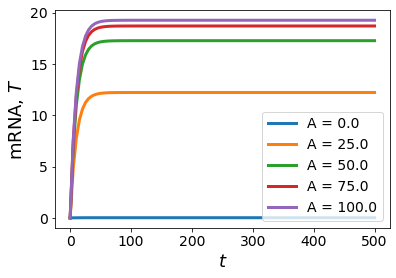

In [51]:
ax = plt.axes()
for A in amounts_of_A:
    solution = odeint(func = activated_gene_expression, y0 = initial_values, t = timepoints, 
                      args = (k_tx, alpha, A, n, K, d_T, k_tl, d_X))
    ax.plot(timepoints, solution[:,0], lw = 3, label = 'A = '+str(A))
ax.set_xlabel('$t$', fontsize = 18)
ax.set_ylabel('mRNA, $T$', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

### Effect of the leak parameter

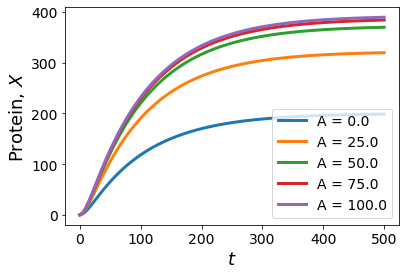

In [52]:
def activated_gene_expression(x, t, *args):
    k_tx, alpha, A, n, K, d_T, k_tl, d_X = args
    T, X = x
    dT_dt = k_tx * (alpha + A**n/(A**n + K**n)) - d_T*T
    dX_dt = k_tl * T - d_X*X
    return np.array([dT_dt, dX_dt])

from scipy.integrate import odeint
import numpy as np

# Parameters 
k_tx = 2
alpha = 1 # High leak 
amounts_of_A = np.linspace(0,100,5)
n = 2
K = 20
d_T = 0.1
k_tl = 0.1
d_X = 0.01

# Initial conditions

initial_values = np.array([0, 0])
timepoints = np.linspace(0,500,100)
ax = plt.axes()
for A in amounts_of_A:
    solution = odeint(func = activated_gene_expression, y0 = initial_values, t = timepoints, 
                      args = (k_tx, alpha, A, n, K, d_T, k_tl, d_X))
    ax.plot(timepoints, solution[:,1], lw = 3, label = 'A = '+str(A))
ax.set_xlabel('$t$', fontsize = 18)
ax.set_ylabel('Protein, $X$', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

The plot for A = 0 corresponds to the leaky expression. We can see that with $\alpha = 1$, the leaky expression is quite high compared to $\alpha = 0.001$ previously.